In [1]:
import sqlite3
conn=sqlite3.connect("Frank.db")
conn
conn.close()

In [20]:
conn=sqlite3.connect("data29_2.db")
cursor=conn.cursor()
sql='''Create table student(id int,
               name text,
               gender text)'''
cursor.execute(sql)
cursor.close()
conn.close()


OperationalError: table student already exists

In [22]:
conn=sqlite3.connect("data29_2.db")
#cursor=conn.cursor() 
sql='''Create table student2(id int,
               name text,
               gender text)'''
cursor.execute(sql)
#cursor.close()
conn.close()


In [23]:
conn=sqlite3.connect("data29_2.db")
#cursor=conn.cursor() 
sql='''Create table student3(id INTEGER PRIMARY KEY AUTOINCREMENT,
               name text,
               gender text)'''
cursor.execute(sql)
#cursor.close()
conn.close()

In [15]:
import sqlite3
conn=sqlite3.connect("data29_2.db")
print('please enter students data:')
tag='Y'
while True: 
        new_id=int(input('Please enter ID:'))
        new_name=input('Please enter name:')
        new_gender=input("Please enter gender:")
        x=(new_id,new_name,new_gender)
        sql='''insert into student3 values(?,?,?)''' #輸入到 student 這張表單
        conn.execute(sql,x)
        conn.commit()
        tag=input('Continue [Y/N]:')
        if tag=='N':
            break
conn.close()
        



please enter students data:
Please enter ID:5555555555555555
Please enter name:ddddddddddddddddd
Please enter gender:b
Continue [Y/N]:N


In [16]:
import sqlite3
conn=sqlite3.connect("data29_2.db")
result=conn.execute("SELECT * from student3")
for r in result:
    print("id=",r[0])
    print("name=",r[1])
    print("gender=",r[2])
conn.close()    
    

id= 1
name= fffefee
gender= b
id= 5555555555555555
name= ddddddddddddddddd
gender= b


In [1]:
import sqlite3
conn=sqlite3.connect("data29_2.db")
result=conn.execute("SELECT name,gender from student3 where gender='b'")
alldata=result.fetchall()
for r in alldata:
    print(r)
conn.close()    

('ddddddddddddddddd', 'b')


In [5]:
import sqlite3
conn=sqlite3.connect("data29_2.db")
sql=''' UPDATE student3 set gender='f'  where name='fffefee' '''
result=conn.execute(sql)
conn.commit()
result=conn.execute("SELECT id,name,gender from student3") 
alldata=result.fetchall()
for r in alldata:
    print(r)
conn.close()  




(5555555555555555, 'ddddddddddddddddd', 'b')


In [6]:
import sqlite3
conn=sqlite3.connect("data29_2.db")
sql=''' DELETE from student3 where name='fffefee' '''
result=conn.execute(sql)
conn.commit()
result=conn.execute("SELECT id,name,gender from student3") 
alldata=result.fetchall()
for r in alldata:
    print(r)
conn.close()  



(5555555555555555, 'ddddddddddddddddd', 'b')


In [16]:
#匯入excel  .xlsx 檔至sql
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn=sqlite3.connect("2330_from_20210101_to_20220101.db")

df = pd.read_excel('2330_from_20210101_to_20220101.xlsx') #讀取
df.to_sql(name='stock_test22', con=conn)                   #寫入




ConversionError: Failed to convert value(s) to axis units: array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None], dtype=object)

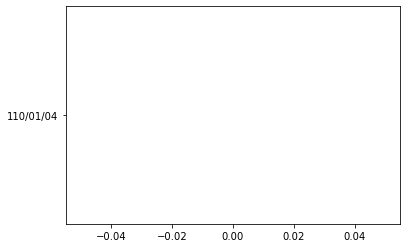

In [94]:
import sqlite3
import matplotlib.pyplot as plt

conn=sqlite3.connect("2330_from_20210101_to_20220101.db")
result=conn.execute("SELECT * from stock_test22") 

date,stock,price,open_price,high,low,close=[],[],[],[],[],[],[]
for i in result:
    date.append(i[0])
    stock.append(i[1])
    price.append(i[2])
    open_price.append(i[3])
    high.append(i[4])
    low.append(i[5])
    close.append(i[6])
conn.close()

seq=date  #error

linedstock,=plt.plot(seq,stock,'-',label='male')
lineprice,=plt.plot(seq,price,'-^',label='price')
linetopen_price,=plt.plot(seq,open_price,'-*',label='open_price')
linethigh,=plt.plot(seq,high,'-.',label='high')
linetlow,=plt.plot(seq,low,'-/',label='low')
linetclose,=plt.plot(seq,close,'-@',label='close')

plt.legend(handles=[linedstock,lineprice,linetopen_price,linethigh,linetlow,linetclose],loc=2)
plt.title('2330')
plt.xlabel("2019",fontsize=10)
plt.ylabel("date",fontsize=12)

plt.show()
                   


In [79]:
#匯入csv檔至sql
import sqlite3
import csv
import matplotlib.pyplot as plt

conn=sqlite3.connect("population.db")
sql='''Create table population(
    area TEXT,
    male int,
    female int,
    total int)'''

conn.execute(sql)
fn="populations.csv"

with open(fn,'r') as csvFile:
    csvreader=csv.reader(csvFile)
    listcsv=list(csvreader)
    csvdata=listcsv[4:]
    for i in csvdata[0:11]:
        area=i[0]
        male=int(i[7])
        female=int(i[8])
        total=int(i[6])
        x=(area,male,female,total)
        sql='''insert into population values(?,?,?,?)'''
        conn.execute(sql,x)
        conn.commit()

result=conn.execute("SELECT * from population") 
        
    
conn.close()
    
        



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


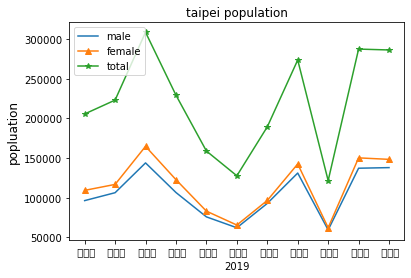

In [91]:
import sqlite3
import csv
import matplotlib.pyplot as plt
import pylab as mpl

conn=sqlite3.connect("population.db")
result=conn.execute("SELECT * from population") 

area,male,female,total=[],[],[],[]
for i in result:
    area.append(i[0])
    male.append(i[1])
    female.append(i[2])
    total.append(i[3])
conn.close()

seq=area
mpl.rcParams["font.sans-serif"]=["SimHei"]
linemale,=plt.plot(seq,male,'-',label='male')
linefemale,=plt.plot(seq,female,'-^',label='female')
linetotal,=plt.plot(seq,total,'-*',label='total')

plt.legend(handles=[linemale,linefemale,linetotal],loc=2)
plt.title('taipei population')
plt.xlabel("2019",fontsize=10)
plt.ylabel("popluation",fontsize=12)

plt.show()




In [76]:
conn.close()

In [74]:
import sqlite3
import csv
import matplotlib.pyplot as plt

conn=sqlite3.connect("population.db")
sql='''Create table population34(
    area TEXT,
    male int,
    female int,
    total int)'''

conn.execute(sql)
fn="populations.csv"
with open(fn,'r') as csvFile:
    csvreader=csv.reader(csvFile)
    listcsv=list(csvreader)
    csvdata=listcsv[4:]
    for i in csvdata[0:12]:
        print(i[0])
        print('area=',type((i[0])))
        print('male=',type(int(i[7])))
        print('female=',type(int(i[8])))
        print('total=',type(int(i[6])))

    
conn.close()   

  松山區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  信義區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  大安區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  中山區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  中正區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  大同區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  萬華區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  文山區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  南港區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  內湖區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  士林區 
area= <class 'str'>
male= <class 'int'>
female= <class 'int'>
total= <class 'int'>
  北投區 
are

In [77]:
conn.close()   